<a href="https://colab.research.google.com/github/Non-NeutralZero/datascience-dev-helpers/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   P: ***We want to figure out a way to separate data into classes***
*   S: A linear classifier can help. Its objective would be to divide data using a hyperplane, and since the data points, from each class, that are closer to the classifier will be helping us decide on the orientation and position of the classifier, we can give them a fancy name (Support vectors) and call our linear classifier, the Support Vector Classifier. 
*   P: ***But, If the data is "clearly" separable, then we won't have one classifier - we would actually end up with so many possibilities to choosing one hyperplane AND we have to make sure future predictions are more likely to be correctly classified***
*   S: We could choose the one that insures the maximum distance between the Support vectors of the two classes (we'll call it a **maximum margin classifier**.) That way, we'll seperate the existing data, and have more confidence in classifying future data points.
*   P: ***We'll be looking to maximize the margin between the data points and the hyperplane, how do we do that?***
*   S: Hinge Loss!
*   P: ***Overfitting, this type of classifier would be very sensitive to outliers for example***
*   S: Explorative data analysis, outliers analysis or allow misclassification (more on that below). 

In [0]:
#@title ##Imports [run the cell]
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn import metrics

# SVC

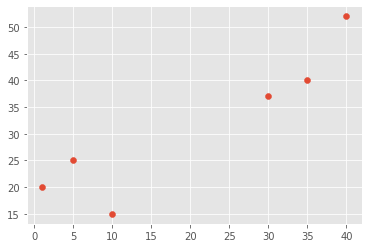

In [3]:
# let's try to divide some observations based on some two features
x = [1, 5, 30, 10, 35, 40]
y = [20, 25, 37, 15, 40, 52]
## First, let's see how the observations look in a 2D viz
plt.scatter(x,y)
plt.show()

In [4]:
X = np.array([[1,20], 
             [5,25],
             [30,37],
             [10,15],
             [35,40],
             [40,52]])
y = np.array([0,0,1,0,1,1])

clf = svm.SVC(kernel='linear')
## Fitting the classifier
clf.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[0.06447349 0.03229683]


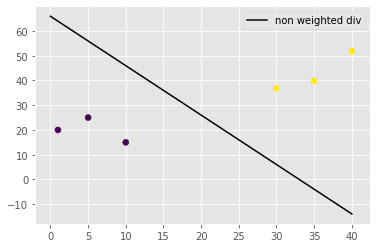

In [5]:
w = clf.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(0,40)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

*   P: ***Linear Inseparability***
*   S: We can allow the classifier to make some misclassifications. Once we do that we can apply the maximum margin concept we used when data was linearly separable. And even if data is linearly separable, we can choose this solution to avoid overfitting.
*   P: ***How do we control this trade-off? (i.e. minimizing misclassifications and maximizing the margin)***
*   S: We can add a hyperparameter C (to our original objective function). when C is small misclassifications are less important and the focus is more on maximizing the margin.
*   P: ***But not all data points are "equal", in the sense that data points that are far away from the bouandry shouldn't be misclassified***
*   S: We can incorporate a panalty on that distance. Now, our objective function will have three parts: maximizing margin, minimizing misclassifications, penalizing distant points on the wrong side of the boundry.

In [6]:
data = load_breast_cancer()
X= pd.DataFrame(data.data, columns = data.feature_names)
y= pd.Series(data.target)

X = np.array([[1,20], 
             [5,25],
             [30,37],
             [20,35],
             [35,40],
             [40,52]])
y = np.array([0,0,1,0,1,1])

C = 0.5
classifier = svm.LinearSVC(C=C, max_iter=10000)
classifier.fit(X,y)

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

[0.06447349 0.03229683]


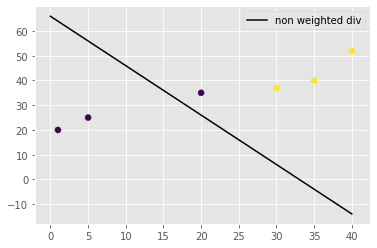

In [7]:
w = clf.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(0,40)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

# Kernel functions

Another solution to data inseparability is kernel functions. 

[See: How to intuitively explain what a kernel is?](https://stats.stackexchange.com/questions/152897/how-to-intuitively-explain-what-a-kernel-is)



In [8]:
data = load_breast_cancer()
X= pd.DataFrame(data.data, columns = data.feature_names)
y= pd.Series(data.target)


C = 1.0  # SVM regularization parameter, should be determined using cross-val
models = (svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C, coef0=0.5))

models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

svms= []
for title, clf in zip(titles, models):
    svms.append(clf)  
    print("Accurary score for {0} is \n {1} on train \n".format(title, \
                                                metrics.accuracy_score(y, clf.predict(X)) 
                                                 ))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accurary score for SVC with linear kernel is 
 0.9138840070298769 on train 

Accurary score for LinearSVC (linear kernel) is 
 0.9666080843585237 on train 

Accurary score for SVC with RBF kernel is 
 1.0 on train 

Accurary score for SVC with polynomial (degree 3) kernel is 
 0.9701230228471002 on train 



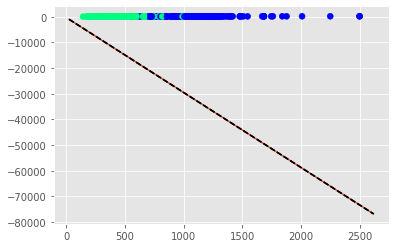

In [9]:
## pick a linear kernel model 
model = svms[1]

plt.scatter(X.iloc[:,3], X.iloc[:,2], c=y, cmap='winter');

ax = plt.gca()
xlim = ax.get_xlim()
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - model.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (model.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (model.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

## SVMs hypertuning

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

parameter_candidates = [
  {'C': [0, 0.5, 1.0, 10], 
   'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5, 1], 
   'kernel': ['rbf']},
   {'C': [0, 0.5, 1.0, 10], 
   'gamma': [ 0.01, 0.1, 0.5, 1], 
   'degree': [2,3,4],
   'kernel': ['poly']}
]

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=123)
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=20, 
                   cv=cv, scoring="roc_auc", verbose=1)

clf.fit(X, y) 

# View the best parameters for the model found using grid search
print('\n######### GridSearchCV results ##########')
print('Best C:',clf.best_estimator_.C) 
print('Best score:', clf.best_score_)
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    7.9s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:   17.6s
